# Problem 3 (6 Points)

SciKit-Learn only offers a few built-in preprocessors, such as MinMax and Standard scaling. However, it also offers the ability to create custom data transformation functions, which can be integrated into your pipeline. In this problem, you will implement a log transform and observe how using it changes a regression result.

Start by running this cell to import modules and load data:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVR

def plot(X_train, X_test, y_train, y_test, model=None,log = False):
    plt.figure(figsize=(5,5),dpi=200)
    if model is not None:
        X_fit = np.linspace(min(X_train)-0.15,max(X_train)+0.2)
        y_fit = model.predict(X_fit)
        plt.plot(np.log(X_fit+1) if log else X_fit, y_fit,c="red",label="Prediction")
    if log:
        X_train = np.log(X_train+1)
        X_test = np.log(X_test+1)

    plt.scatter(X_train,y_train,s=30,c="powderblue",edgecolors="navy",linewidths=.5,label="Train")
    plt.scatter(X_test,y_test,s=30,c="orange",edgecolors="red",linewidths=.5,label="Test")
    plt.legend()
    plt.xlabel("log(x+1)" if log else "x")
    plt.ylabel("y")
    plt.show()

x = np.array([ 5.83603919,  1.49205924,  2.66109578,  9.40172515,  6.47247125, 0.37633413,  2.58593829,  0.85954061,  0.90192956,  1.50771989, 1.15493443,  4.28137195,  2.14049632,  1.12938701,  1.55871729, 1.3960884 ,  4.45523172,  0.8145184 ,  1.36761412,  0.42566793, 0.07784856,  1.92248495,  2.37366743,  0.47608207,  9.67702601, 0.23354846,  1.04682159,  0.82929126,  4.63102958,  4.34644717, 1.16759657,  1.45960014,  0.41156606,  0.13795931,  0.70616091, 1.16923416,  3.42222417,  3.32802771,  0.67886919,  0.73911426, 0.35044449,  0.24170968,  0.18154165,  7.0341397 ,  0.60070448, 0.64527784,  0.28570503,  2.17600441,  0.19911   ,  0.80836606, 0.408417  ,  1.47241292,  0.60001229,  0.30708454,  0.97221119, 1.53469532,  1.06877937,  1.35319965,  0.53029486,  0.6957665 , 0.51045109,  0.69798814,  0.44346062,  0.17794467,  1.19413986, 0.66912731,  0.19589072,  1.58848742,  0.40361317,  1.05331823, 2.07319431,  1.13767068,  3.12489501,  0.29088542,  1.49532211, 0.50418597,  0.41861772,  0.56054281,  0.73230914,  1.05777256, 0.31187593,  2.46163678,  1.59306915,  0.2151879 ,  4.42934711, 6.65846632,  3.25040489,  0.835333  ,  0.34275046,  2.87040096, 0.66819385,  3.39547978,  1.23155177,  2.65551613,  1.42813072, 2.02703304,  1.01055534,  5.96476998,  1.13531721,  1.49479543, 6.57418553,  0.25982185,  0.28069545,  2.63635349,  0.30939905, 6.98399558,  0.66125285,  0.47357035,  6.84105546,  4.39520771, 6.47247753,  2.4745156 ,  0.42264374,  6.75352745,  0.7649052 , 2.23101446,  2.5786138 ,  0.85640653,  1.84795453,  2.51483368, 1.45706703,  0.3330706 ,  1.34748269,  3.76740297,  0.49929016, 0.86102259,  0.64716529,  6.35513869,  1.95872697,  1.50299808, 0.46305193,  1.71471895,  0.50949631,  1.03234257,  0.52948731, 1.96685003,  1.77995987,  0.81196442,  1.48587929,  0.33518874, 0.22508941,  1.551763  ,  1.18136848,  1.88708146, 10.83893534, 2.57147454,  0.40138981,  3.05572319,  0.26823082,  0.6302841 , 0.93403478,  5.54747418,  0.47485071,  0.43760503,  0.90623872, 0.5150567 ,  3.08525997,  0.33961879,  0.3174393 ,  0.64544192, 0.60772521,  6.88628708,  2.58421247,  1.09149819,  0.29362979, 2.32649531,  0.36780023,  0.2133607 ,  3.28061135,  1.37292378, 2.51144635,  1.37537669,  2.35568278,  0.52151064,  0.35549545, 1.97702763,  0.44779951,  0.50180194,  0.63411021,  1.01763281, 0.70187924,  0.25285191,  0.52538792,  0.10824012,  1.86867841, 0.20148151,  0.33141519,  1.05354965,  0.47732246,  4.67867334, 0.27448548,  1.30610689,  0.96147875,  0.31095922,  1.68754812, 0.84236124,  2.16363689,  2.27846997,  8.69924247,  3.80580659])
X = x.reshape(-1,1)
y = np.array([ 4.32538472e+00, -5.59312420e+00, -4.57455876e+00,  4.23667057e+01, 1.04907251e+01, -4.16547735e+00, -6.27910380e+00, -4.66593935e+00, -3.27628398e+00, -5.41260576e+00, -3.07553025e+00, -2.60088666e+00, -4.94126516e+00, -5.07104868e+00, -6.78065624e+00, -5.64645372e+00, -2.45259954e+00, -2.84042416e+00, -1.57873879e+00, -2.01053220e+00, -1.81709993e+00, -6.43544903e+00, -6.92943404e+00, -1.43153401e+00, 4.29485069e+01, -1.01830444e+00, -3.90351271e+00, -3.11046074e+00, -2.60468704e+00, -3.19751543e+00, -6.61079247e+00, -5.90754795e+00, -2.70273587e+00, -4.66887251e-02, -4.76641497e+00, -3.30726512e+00, -3.15777577e+00, -8.66934765e+00, -2.29409449e+00, -2.13391937e+00, -2.58556664e+00, -1.74603256e+00, -1.07407173e+00,  1.38617365e+01, -3.10619598e+00, -5.32401140e+00,  3.81599556e-01, -4.52559897e+00, -2.17595159e+00, -5.58801110e+00, -1.09368325e+00, -6.05774675e+00, -2.42711696e+00, -1.92011443e+00, -2.87855321e+00, -4.27606315e+00, -5.29000358e+00, -7.00989489e+00, -4.74466924e+00, -2.07917240e+00, -4.07498403e+00, -3.76297780e+00, -2.91511682e+00, -9.36910003e-01, -7.44914900e+00, -2.61473730e+00, -1.55243871e-01, -5.28651169e+00, -2.32149151e+00, -4.01101159e+00, -5.46926738e+00, -8.55294796e+00, -2.92563777e+00, -7.84672807e-01, -6.21923521e+00, -2.85315642e+00, -1.17723512e+00, -2.66266171e+00, -6.17129572e+00, -1.07324073e+00, -1.62792403e+00, -4.71826920e+00, -6.46555121e+00,  1.27493192e+00, -2.09810420e+00,  1.19561079e+01, -7.25477255e+00, -1.66216583e+00, -5.61547171e-01, -4.16003379e+00, -3.83661758e+00, -6.16965664e+00, -1.18516405e+00, -7.81583847e+00, -5.30502079e+00, -4.32096521e+00, -3.88496715e+00,  6.62906156e+00, -4.98681443e+00, -4.68447995e+00, 8.38919748e+00,  1.25559415e+00, -1.50193339e+00, -7.25167503e+00, -4.51692863e-01,  1.31651367e+01, -4.87039664e+00, -4.16365912e+00, 1.36354222e+01, -2.89754788e+00,  9.33002536e+00, -4.63273484e+00, -3.62482967e+00,  1.07464791e+01, -3.81676576e+00, -6.03611939e+00, -6.30707705e+00, -3.97893131e+00, -5.91727631e+00, -6.41073788e+00, -6.24169740e+00, -2.77390647e+00, -4.50992930e+00, -5.98006234e+00, -3.98319304e+00, -4.03219142e+00, -3.05350405e+00,  1.19971796e+01, -7.01407392e+00, -3.84109609e+00, -9.80060053e-01, -7.41675111e+00, -1.12801561e+00, -5.87180262e+00, -6.35583810e+00, -5.05627183e+00, -8.36537808e+00, -2.72413419e+00, -6.24757554e+00,  9.25733994e-01, 5.27982307e-01, -6.03092529e+00, -5.54296733e+00, -7.69544697e+00, 6.26264586e+01, -6.66542463e+00, -2.39287559e+00, -5.70611595e+00, -4.01424069e-01, -2.22968078e+00, -4.94396881e+00,  8.80411673e-01, -1.01972575e-01, -3.03070076e+00, -4.68836537e+00, -3.09178407e+00, -8.67207510e+00, -2.29971402e+00, -2.20591252e+00, -1.88007689e+00, -1.62161041e+00,  1.29951706e+01, -4.84513570e+00, -3.75617518e+00, -1.40545367e+00, -5.97850387e+00, -1.98970437e+00, -1.61355500e+00, -6.04224622e+00, -6.67171619e+00, -5.82920642e+00, -6.47490784e+00, -4.96672564e+00, -2.70976774e+00, -1.57685774e+00, -5.23574473e+00, -1.07350146e+00, -4.61313963e+00, -3.07881081e+00, -2.73231916e+00, -5.56392046e+00, -6.19404753e-01, -5.73425346e+00, -2.06324496e+00, -5.79348723e+00, -3.45188541e+00, -3.02550603e+00, -6.36553389e+00, 3.13426823e-01, -1.25704084e+00, -4.46149712e-01, -5.15863188e+00, -4.41309998e+00, -3.88281175e+00, -6.02767799e+00, -4.64447206e+00, -4.84997397e+00, -4.48927165e+00,  3.43804753e+01, -3.26604125e+00])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)

## Distribution of x data
Let's visualize how the original input feature is distributed, alongside the log of the data -- notice that performing this log transformation makes the data much closer to normally distributed.



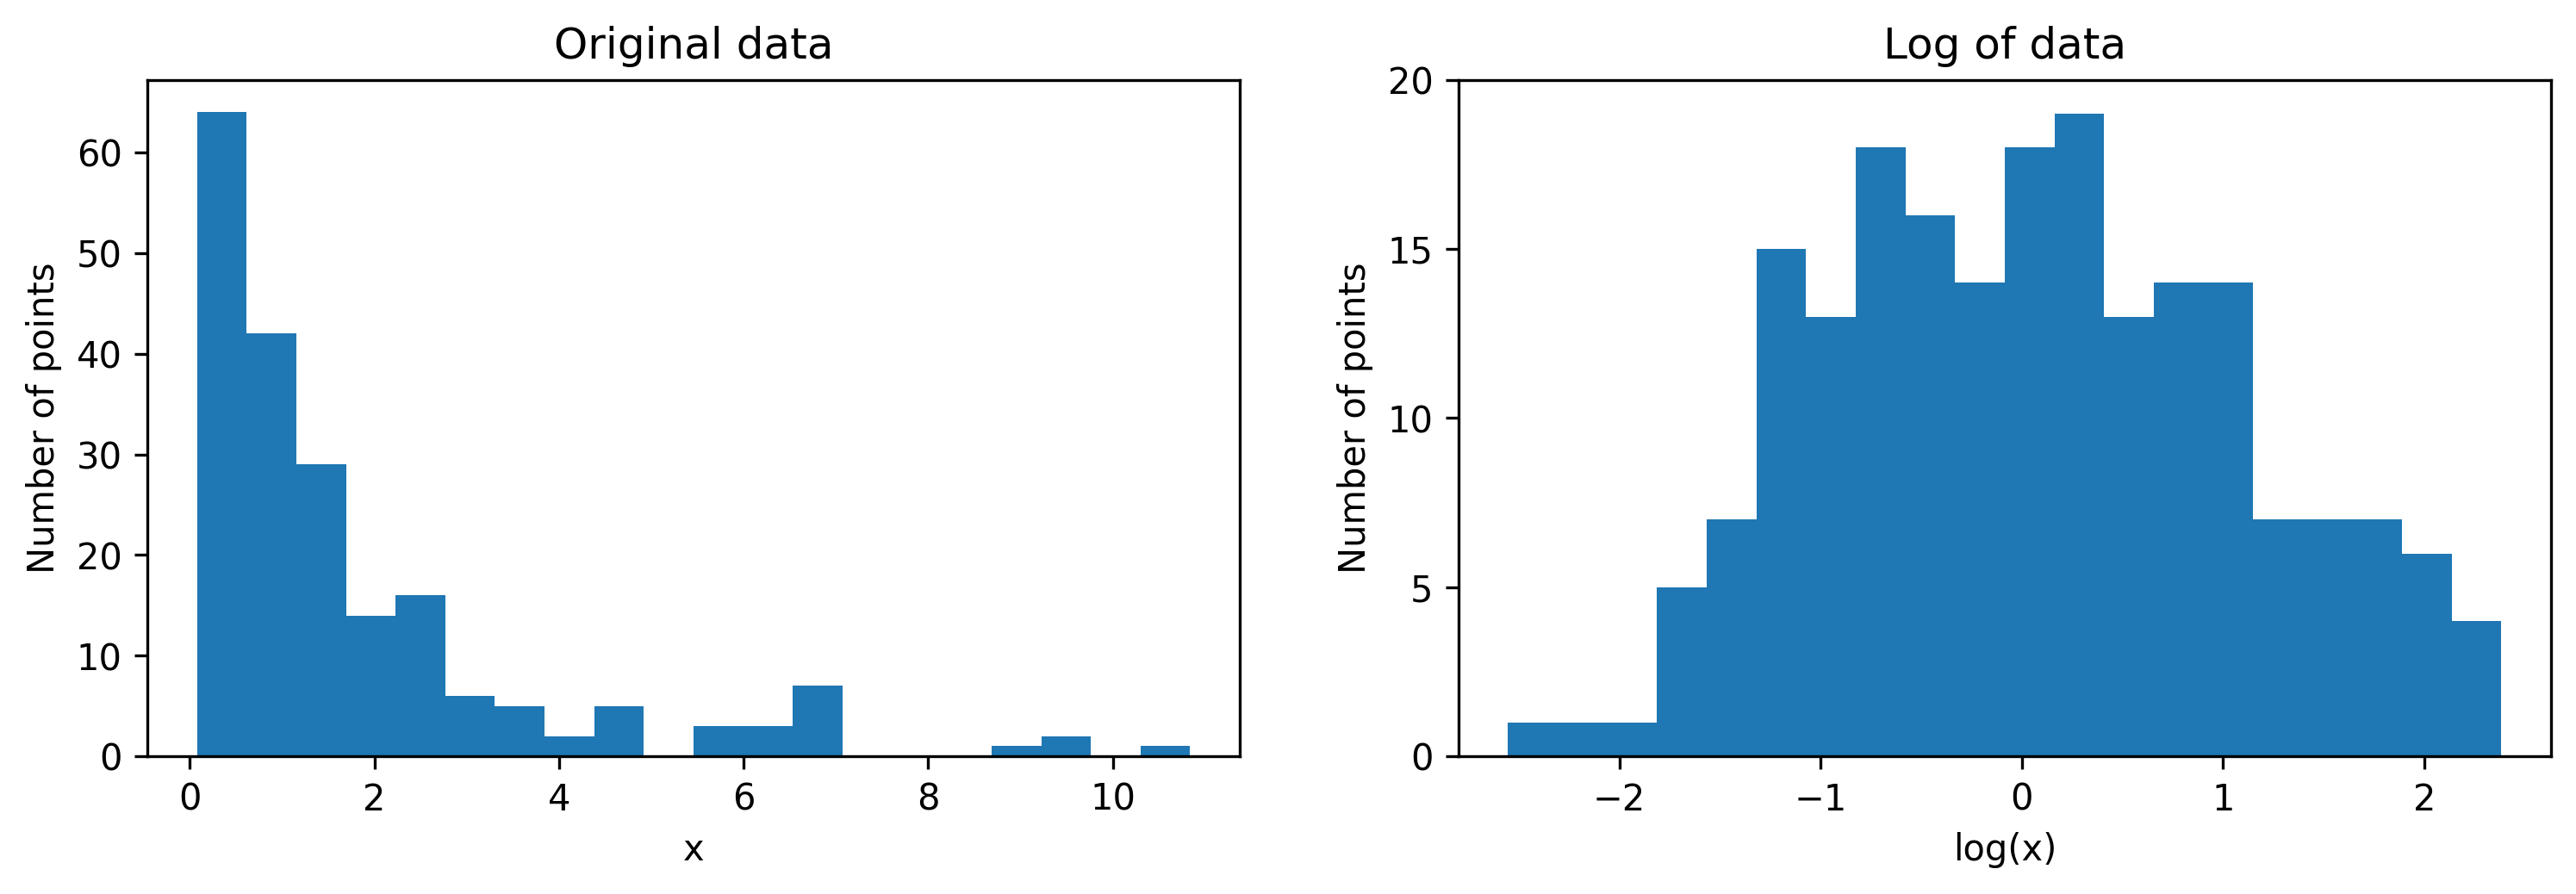

In [2]:
plt.figure(figsize=(12,3.4),dpi=300)
plt.subplot(1,2,1)
plt.hist(x,bins=20)
plt.xlabel("x")
plt.ylabel("Number of points")
plt.title("Original data")

plt.subplot(1,2,2)
plt.hist(np.log(x),bins=20)
plt.xlabel("log(x)")
plt.ylabel("Number of points")
plt.title("Log of data")
plt.ylim(0,20)
plt.yticks([0,5,10,15,20])

plt.show()

## No log transform
First, we do support vector regression on the untransformed inputs. The code to do this has been provided below.

Training MSE: 2.0710061552336017    Testing MSE: 1.9453578716771627


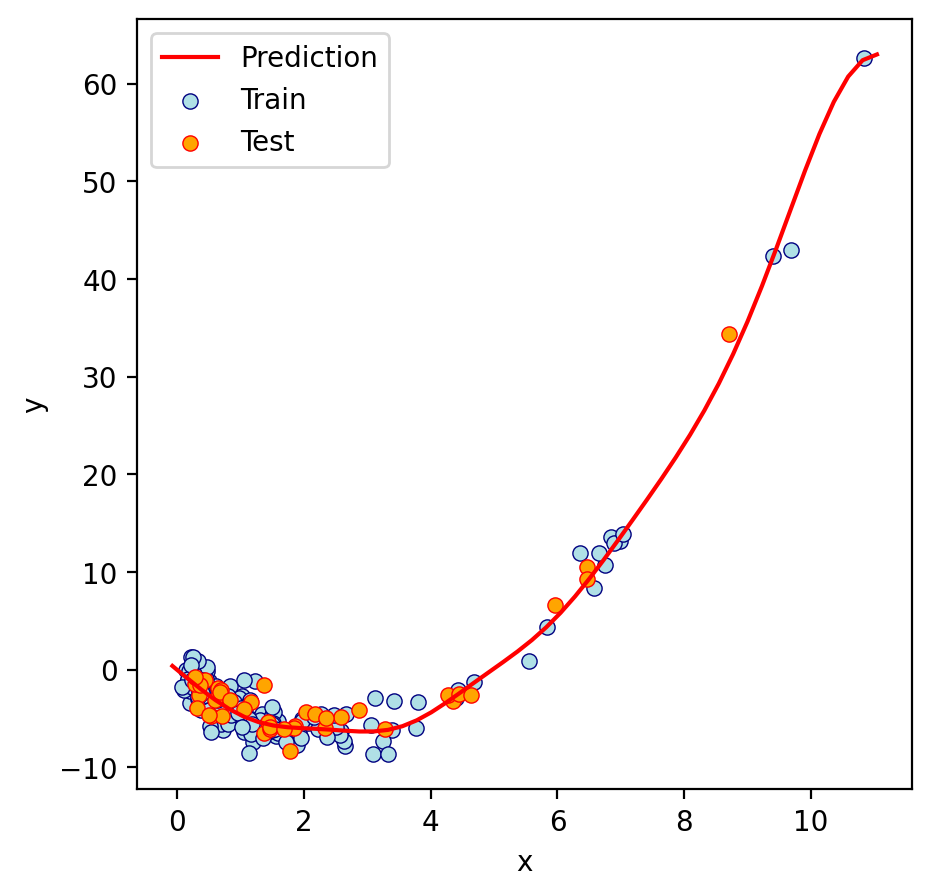

In [3]:

model = SVR(C=100)

pipeline = Pipeline([("SVR", model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions with the pipeline
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)
print("Training MSE:", mean_squared_error(y_train, pred_train), "   Testing MSE:", mean_squared_error(y_test, pred_test))

# Plot the predictions
plot(X_train, X_test, y_train, y_test, pipeline)


## With log transform
Notice that the data are not spread uniformly across the x axis. Instead, most input data points have low values -- this is a roughly "log normal" distribution. 
If we take the log of the input, we saw it was more normally distributed, which can improve machine learning model results in some cases. The transform function has been given below. Add this to a new pipeline, train the pipeline, and compute the train MSE and test MSE. Show a plot as above. Note the subtle change in behavior of the fitting curve.

Also, make another plot setting the `log` argument to `True`. This will show the scaling of the x-axis used by the model.

Training MSE: 2.3139214731606534    Testing MSE: 1.7200875366333022


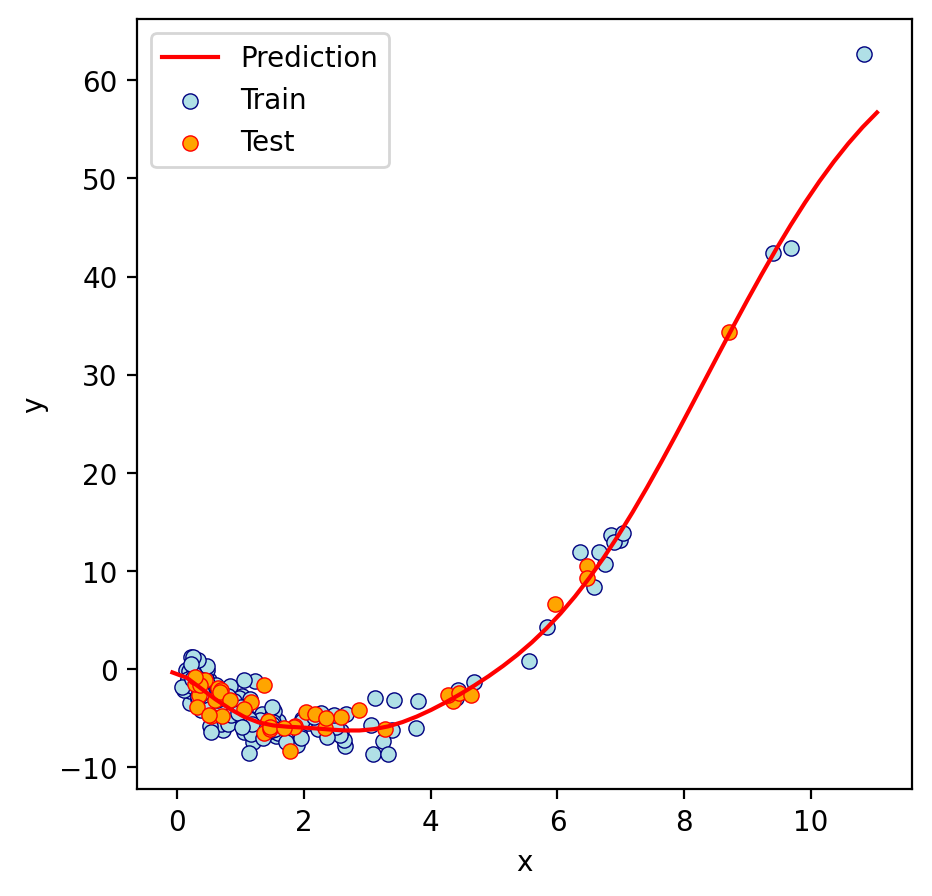

In [7]:
def log_transform(x):
    return np.log(x + 1.)

transform = FunctionTransformer(log_transform)
model = SVR(C=100)

pipeline = Pipeline([("transform", transform), ("SVR", model)])
pipeline.fit(X_train, y_train)

print("Training MSE:", mean_squared_error(y_train, pipeline.predict(X_train)), "   Testing MSE:", mean_squared_error(y_test, pipeline.predict(X_test)))
plot(X_train, X_test, y_train, y_test, pipeline)